# Analisis de Sentimiento tomado de reseñas en español

El presente modelo corresponde al proyecto realizado por:
* Kemonito
* PhilipSanM

Nos enfocamos a un modelo de sentimientos basado en Tweets, relevantes en sentimeintos y emociones, de personas que hablan espanol

## Lectura de datos / Data lecture

In [1]:
import pandas as pd
import numpy as np


In [2]:
sentiment_dataframe = pd.read_csv("./Obtencion de datos/sentiment_dataframe.csv")
sentiment_dataframe

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared
...,...,...,...,...,...
2585,@lavivianaleyva,No podemos vivir con miedo: ¡Manejen borrach...,"Jan 6, 2024 · 3:08 AM UTC",daring,joyful
2586,@Carmeen_Alicia,"La vida es un constante, SIN MIEDO AL ÉXITO 💅🏼","Jan 6, 2024 · 3:07 AM UTC",daring,joyful
2587,@homicidios_,Esquizofrenia = mente dividida: Miedo a las re...,"Jan 6, 2024 · 2:59 AM UTC",daring,joyful
2588,@brigethcoba,"""Lo que más miedo me da, es ver cómo desaparec...","Jan 6, 2024 · 2:55 AM UTC",daring,joyful


In [3]:
sentiment_dataframe.shape

(2590, 5)

In [4]:
translation = {
    'joyful': 'Felicidad',
    'daring': 'Atrevimiento',
    'optimistic': 'Optimista',
    'playful': 'Jugueton',

    'powerful': 'Empoderado',
    'surprised': 'Sorpresa',
    'successful': 'Triunfo',
    'confident': 'Confiado',

    'peaceful': 'Paz',
    'secure': 'Seguro',
    'thankful': 'Agradecido',
    'loving': 'Enamorado',
    'relaxed': 'Relajado',
    'responsive': 'Responsable',

    'sad': 'Tristeza',
    'sleepy': 'Adormilado',
    'isolated': 'Aislado',
    'stupid': 'Tomto ;B',
        
    'mad': 'Furia',
    'distant': 'Distante',
    'frustrated': 'Frustrado',
    'irritated': 'Irritado',
    'jealous': 'Celoso',
    
    'scared': 'Miedo',
    'embarrassed': 'Apenado',
    'overwhelmed': 'Preocupado',
    
}

In [5]:
sentiment_dataframe[['emotion', 'sentiment']] = sentiment_dataframe[['emotion', 'sentiment']].replace(to_replace = translation)
sentiment_dataframe

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",Preocupado,Miedo
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",Preocupado,Miedo
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",Preocupado,Miedo
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",Preocupado,Miedo
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",Preocupado,Miedo
...,...,...,...,...,...
2585,@lavivianaleyva,No podemos vivir con miedo: ¡Manejen borrach...,"Jan 6, 2024 · 3:08 AM UTC",Atrevimiento,Felicidad
2586,@Carmeen_Alicia,"La vida es un constante, SIN MIEDO AL ÉXITO 💅🏼","Jan 6, 2024 · 3:07 AM UTC",Atrevimiento,Felicidad
2587,@homicidios_,Esquizofrenia = mente dividida: Miedo a las re...,"Jan 6, 2024 · 2:59 AM UTC",Atrevimiento,Felicidad
2588,@brigethcoba,"""Lo que más miedo me da, es ver cómo desaparec...","Jan 6, 2024 · 2:55 AM UTC",Atrevimiento,Felicidad


## EDA

<Axes: >

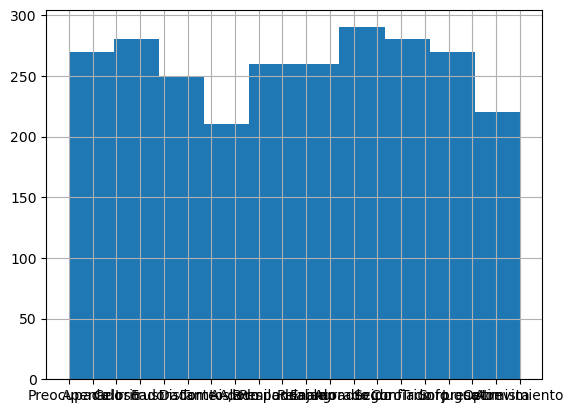

In [6]:
sentiment_dataframe['emotion'].hist()

<Axes: >

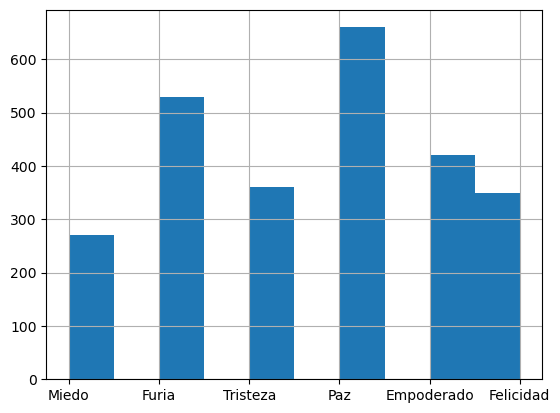

In [7]:
sentiment_dataframe['sentiment'].hist()

## Data Preparation and Model training

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
np.random.seed(73)


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [44]:
target_map ={
        
    'Felicidad': 1,
    'Atrevimiento': 1,
    'Optimista': 2,
    'Jugueton': 3,

    'Empoderado': 2,
    'Sorpresa': 4,
    'Triunfo': 5,
    'Confiado': 6,

    'Paz': 3,
    'Seguro': 7,
    'Agradecido': 8,
    'Enamorado': 9,
    'Relajado': 10,
    'Responsable': 11,

    'Tristeza': 4,
    'Adormilado': 12,
    'Aislado': 13,
    'Tomto ;B': 14,
        
    'Furia': 5,
    'Distante': 15,
    'Frustrado': 16,
    'Irritado': 17,
    'Celoso': 18,
    
    'Miedo': 6,
    'Apenado': 19,
     'Preocupado': 20,
}

classes = ['Atrevimiento', 'Optimista', 'Jugueton', 'Sorpresa', 'Triunfo', 'Confiado', 'Seguro', 'Agradecido', 'Enamorado', 'Relajado', 'Responsable', 'Adormilado', 'Aislado', 'Tomto ;B', 'Distante', 'Frustrado', 'Irritado', 'Celoso', 'Apenado', 'Preocupado']

reversed_map = {value: sentiment for sentiment, value in target_map.items()}

sentiments_map = {
    'Atrevimiento': 'Felicidad',
    'Optimista': 'Felicidad',
    'Jugueton': 'Felicidad',

    'Sorpresa': 'Empoderado',
    'Triunfo': 'Empoderado',
    'Confiado': 'Empoderado',

    'Seguro': 'Paz',
    'Agradecido': 'Paz',
    'Enamorado': 'Paz',
    'Relajado': 'Paz',
    'Responsable': 'Paz',

    'Adormilado': 'Tristeza',
    'Aislado': 'Tristeza',
    'Tomto ;B': 'Tristeza',

    
    'Distante': 'Furia',
    'Frustrado': 'Furia',
    'Irritado': 'Furia',
    'Celoso': 'Furia',
    
    'Apenado': 'Miedo',
     'Preocupado': 'Miedo',
}




In [10]:
sentiment_dataframe['emotion'] =  sentiment_dataframe['emotion'].map(target_map)
dataframe = sentiment_dataframe[['text', 'emotion']].copy()
dataframe.rename(columns = {'emotion': 'target'}, inplace = True)
dataframe.head()

,text,target
0,termine bien abrumado después de hoy,20
1,me siento abrumado,20
2,Me siento un poco abrumado por la cantidad de ...,20
3,Salvador la única persona que no la ha abrumad...,20
4,Denme un helado o algo que ando full abrumado.,20


In [11]:
df_train, df_test = train_test_split(dataframe)

In [12]:
df_train.head()

,text,target
1473,Tengo unas ganas locas de ir a devoto,9
1012,Serían yo somnoliento diciéndole al despertado...,12
716,Estar 4hs desconectado de todo te hace re bien,15
724,"> Art. 144 Las Cortes Generales, mediante ley ...",15
1596,"No puedo cambiar nada de lo que pasó, pero si ...",8


In [13]:
vectorizer = TfidfVectorizer(max_features=2000)

In [14]:
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<1942x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 29094 stored elements in Compressed Sparse Row format>

In [15]:
X_test = vectorizer.transform(df_test['text'])

In [16]:
Y_train = df_train['target']
Y_test = df_test['target']

In [17]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.88259526261586
Test acc: 0.5694444444444444


In [18]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9956448084429115
Test AUC: 0.9232691116199356


In [19]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [20]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.91666667, 0.        , 0.        , 0.        , 0.        ,
        0.01190476, 0.        , 0.01190476, 0.        , 0.03571429,
        0.        , 0.        , 0.01190476, 0.        , 0.        ,
        0.        , 0.01190476, 0.        , 0.        , 0.        ],
       [0.        , 0.80246914, 0.0617284 , 0.04938272, 0.        ,
        0.0617284 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01234568, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01234568, 0.        , 0.        ],
       [0.        , 0.02105263, 0.93684211, 0.        , 0.01052632,
        0.        , 0.01052632, 0.01052632, 0.        , 0.        ,
        0.        , 0.01052632, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.90350877, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

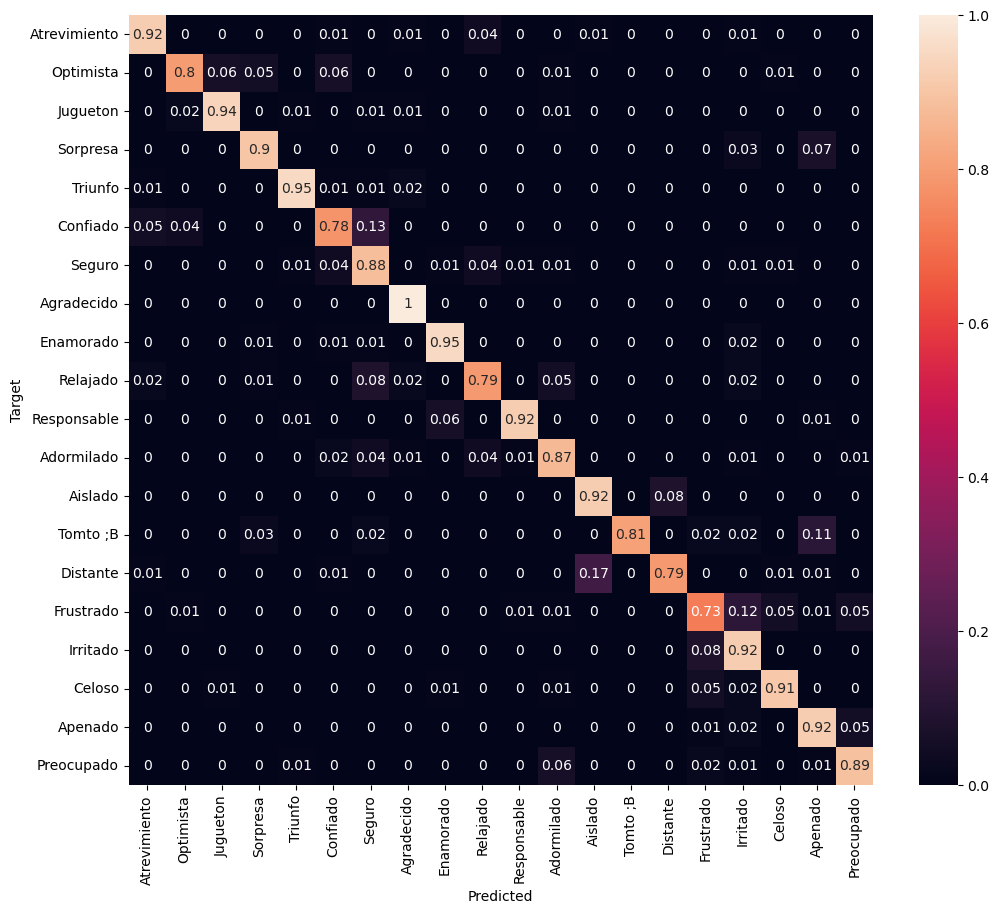

In [28]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm, classes):
  df_cm = pd.DataFrame(cm, index=classes, columns=classes).round(2)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
    
plt.figure(figsize=(12, 10))
plot_cm(cm, classes)

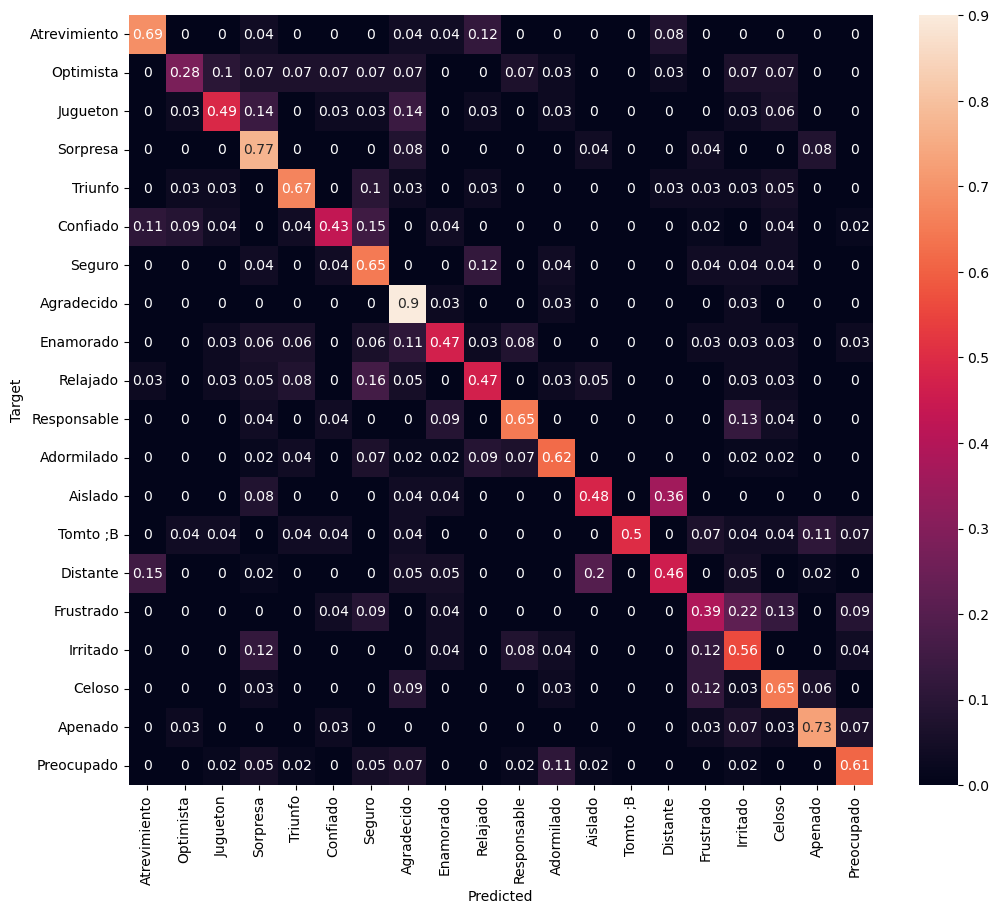

In [29]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')

plt.figure(figsize=(12, 10))
plot_cm(cm_test, classes)

In [36]:
user_text = 'Odio los lunes'
user_vector =  vectorizer.transform([user_text])

user_prediction = model.predict(user_vector)
user_prediction

array([17], dtype=int64)

In [38]:
reversed_map[user_prediction[0]]

'Irritado'

In [45]:
user_text = 'Este año voy a crecer para mí y por mi, me cueste lo que me cueste'
user_vector =  vectorizer.transform([user_text])

user_prediction = model.predict(user_vector)

print('Emocion: ', reversed_map[user_prediction[0]], " - Sentimiento: ", sentiments_map[reversed_map[user_prediction[0]]])

Emocion:  Responsable  - Sentimiento:  Paz


In [46]:
user_text = 'Y no, no hace gente que labore más, hace falta que con menos se pueda vivir en paz'
user_vector =  vectorizer.transform([user_text])

user_prediction = model.predict(user_vector)

print('Emocion: ', reversed_map[user_prediction[0]], " - Sentimiento: ", sentiments_map[reversed_map[user_prediction[0]]])

Emocion:  Celoso  - Sentimiento:  Furia


In [47]:
user_text = 'Yo solo quiero ser una gata jazz.'
user_vector =  vectorizer.transform([user_text])

user_prediction = model.predict(user_vector)

print('Emocion: ', reversed_map[user_prediction[0]], " - Sentimiento: ", sentiments_map[reversed_map[user_prediction[0]]])

Emocion:  Seguro  - Sentimiento:  Paz


In [48]:
user_text = 'La verdad extraño la persona que solías ser, que me recordaba que debo descansar sin sentirme culpable, que se molestó en conocer mi lenguaje corporal y me hizo sentir que quererme no era difícil. Te lo agradezco, pero te llevaste mi parte más vulnerable y ahora no sé qué hacer.'
user_vector =  vectorizer.transform([user_text])

user_prediction = model.predict(user_vector)

print('Emocion: ', reversed_map[user_prediction[0]], " - Sentimiento: ", sentiments_map[reversed_map[user_prediction[0]]])

Emocion:  Frustrado  - Sentimiento:  Furia
